**Using The Prophet Time Series Model to Forecast Sales Volume for a Product**

---



In [ ]:
# install / import dependencies

!pip install pystan
!pip install fbprophet

In [47]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
# connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# read data from file
# the data includes daily sales volume by 'Store' and 'Product'

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/store_product_dataset.csv')

In [52]:
# preview the data

df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [53]:
# get the number of rows and columns

df.shape

(1080, 4)

In [54]:
# check for null values

df.isnull().sum()

Time Date    0
Product      0
Store        0
Value        0
dtype: int64

In [55]:
# clean up the date

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [56]:
# select a single store and product

df = df[(df['Store']=='QLD_CW_ST0203') & (df['Product']==2667437)]

In [57]:
# remove the unnecessary columns, rename the remaining columns with 'Value' as 'y' and date as 'ds'

df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

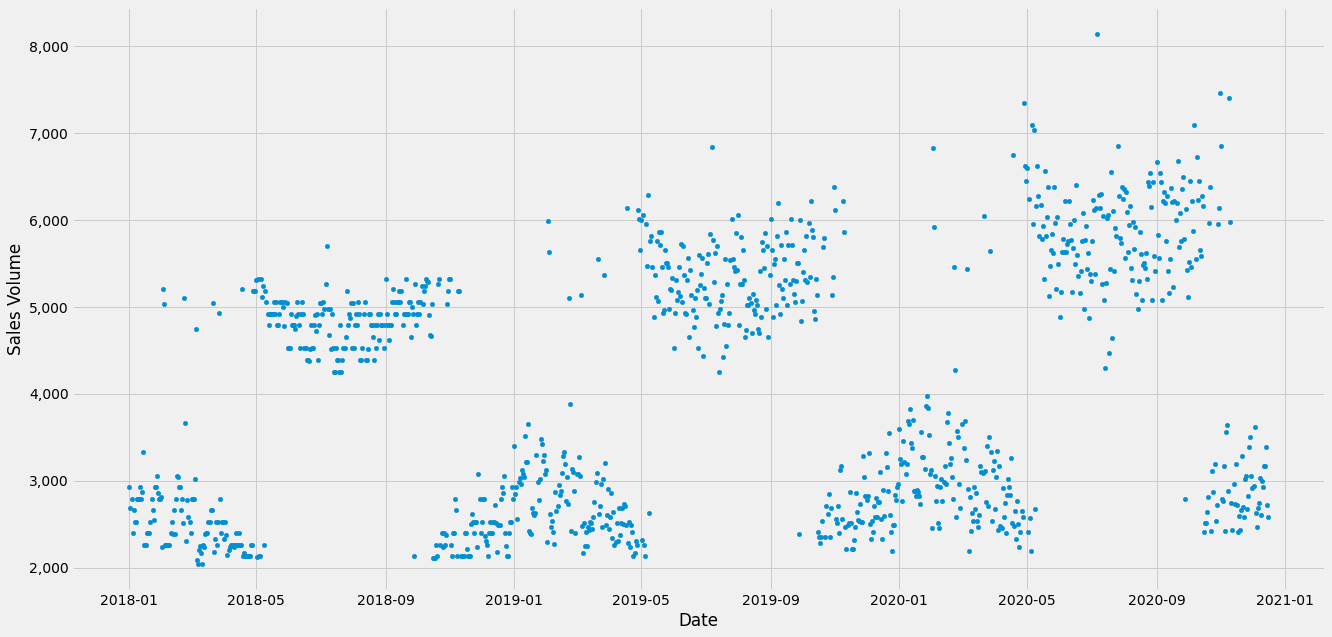

In [58]:
# visualize the data at hand

plot1 = df.plot(
    kind='scatter',
    x='ds',
    y='y',
    xlabel = 'Date',
    ylabel = 'Sales Volume',
    figsize=(20,10))

plot1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [92]:
# instantiate Prophet and fit the model

model = Prophet(interval_width=0.90, daily_seasonality=True)
model = model.fit(df)

In [93]:
# forecast future periods

future = model.make_future_dataframe(periods=365,freq='D')
forecast = model.predict(future)

In [94]:
# preview the forecasted data

forecast[['ds','yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
1440,2021-12-12,2312.040851,3568.954684,4889.209131
1441,2021-12-13,2179.365089,3585.015351,4826.865442
1442,2021-12-14,2259.868354,3580.897120,4871.062764
1443,2021-12-15,2338.530672,3610.521931,4973.723236
1444,2021-12-16,2269.084031,3658.930395,5063.911647


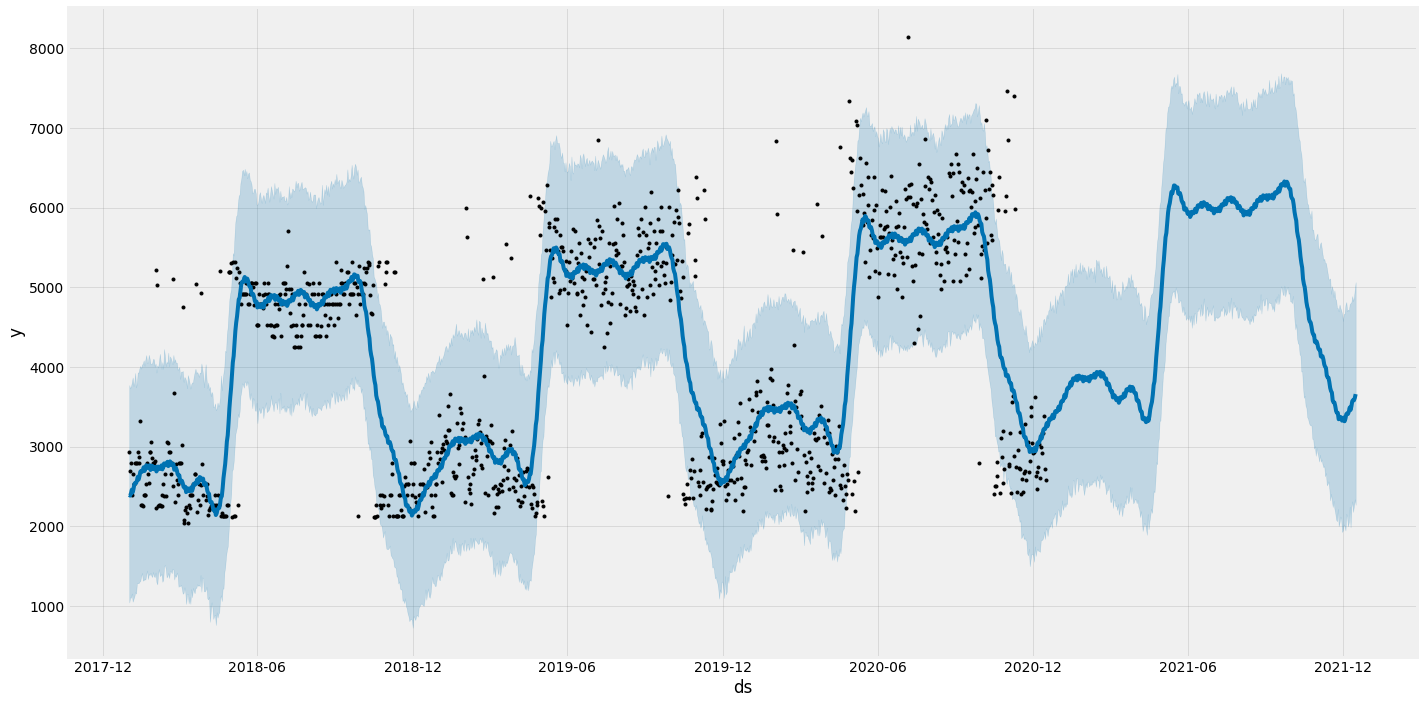

In [95]:
# visualize the forecast;
# blue line is the prediction ('yhat');
# shaded blue region represents the upper bound ('yhat_upper') and the lowers bound ('yhat_lower') of the forecast;
# black dots are the actual value;

plot2 = model.plot(forecast, figsize=(20,10))


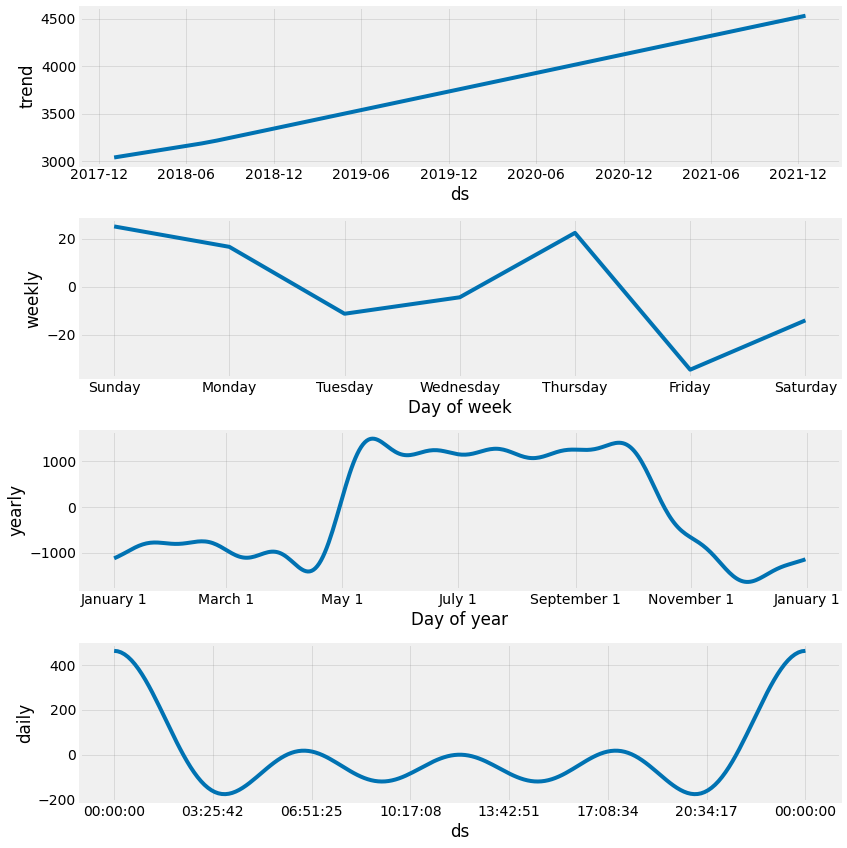

In [101]:
# decompose the trend

plot3 = model.plot_components(forecast, figsize=(12,12))
